In [1]:
using PyPlot, Interact, DSP;

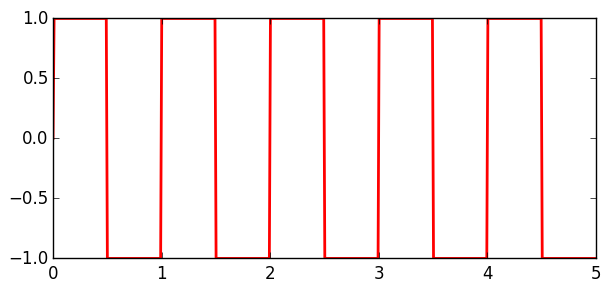

In [2]:
Fₛ=100 #sampling frequency
N = 500; # FFT size
T₀=1 #Period
t_max=5 #number of periods
x_sq(t) = sign(sin(2π*t/T₀)); #define square wave
j=im;

fig_square = figure("Square Wave",figsize=(7,3))

t=linspace(0,t_max,Fₛ*t_max); 
plot(t, x_sq(t), color="red", linewidth=2.0);

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"α",10,1:5:16,true)

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in getindex at array.jl:309
 in anonymous at In[3]:11
 in withfig at /home/macalvin/.julia/v0.4/PyPlot/src/PyPlot.jl:639
 in anonymous at In[3]:5
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/macalvin/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/macalvin/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[3], in expression starting on line 5


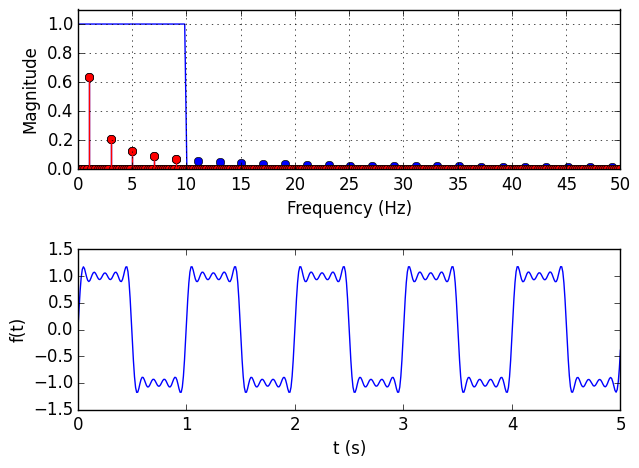

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in getindex at array.jl:309
 in anonymous at In[3]:21
 in withfig at /home/macalvin/.julia/v0.4/PyPlot/src/PyPlot.jl:639
 in anonymous at In[3]:5
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/macalvin/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/macalvin/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[3], in expression starting on line 5


In [3]:
fig_lpf = figure("FFT Square Wave LPF",figsize=(7,5)); subplots_adjust(hspace=0.5,wspace=0.5)
period = linspace(0,N/Fₛ,N);
a = fft(Float64[x_sq(t) for t in period])./N 

@manipulate for α in slider(1:5:20, value=10, label="α"); withfig(fig_lpf) do
        subplot(211)        
        hold("on"); grid("on"); 
        ylabel("Magnitude"); xlabel("Frequency (Hz)"); xticks(0:Fₛ/20:Fₛ/2);
        
        x=linspace(0,Fₛ/2,N/2); #FS plot
        stem(x,abs(a[1:round(N/2)])); 

        ω=linspace(0,Fₛ/2,N/2); #LPF plot
        H=[ones(round(Int,(N/Fₛ)*α),1); zeros(round(Int,N/2 - (N/Fₛ)*α)   ,1)]
        plot(ω, abs(H))
        ylim([0,1.1])

        stem(ω, abs(H.*a[1:round(N/2)]),linefmt="r-", markerfmt="ro", basefmt="r-"); #Attenuated plot
        
        subplot(212); #Reconstruction
        H2 = [H[1:N/2] ;flipdim(H[1:N/2],1)]
        plot(period,ifft(H2.*a).*N); 
        ylabel("f(t)"); xlabel("t (s)"); 

    end
end

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"α",10,1:5:16,true)

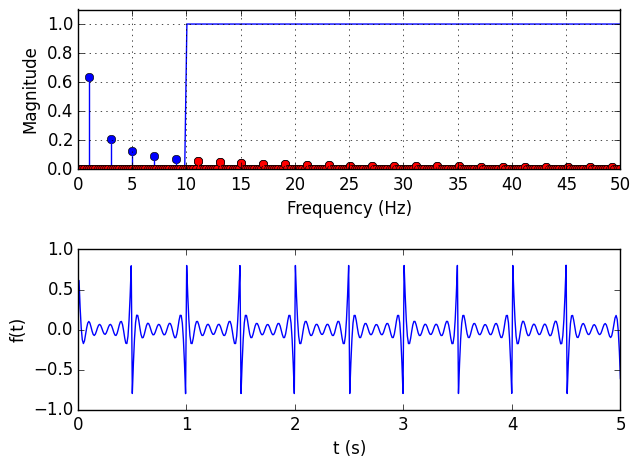

In [4]:
fig_hpf = figure("FFT Square Wave HPF",figsize=(7,5)); subplots_adjust(hspace=0.5,wspace=0.5)
period = linspace(0,N/Fₛ,N);
a = fft(Float64[x_sq(t) for t in period])./N 

@manipulate for α in slider(1:5:20, value=10, label="α"); withfig(fig_hpf) do
        subplot(211)        
        hold("on"); grid("on"); 
        ylabel("Magnitude"); xlabel("Frequency (Hz)"); xticks(0:Fₛ/20:Fₛ/2);
        
        x=linspace(0,Fₛ/2,N/2); #FS plot
        stem(x,abs(a[1:round(N/2)])); 

        ω=linspace(0,Fₛ/2,N/2); #LPF plot
        H=[zeros(round(Int,(N/Fₛ)*α),1); ones(round(Int,N/2 - (N/Fₛ)*α)   ,1)]
        plot(ω, abs(H))
        ylim([0,1.1])

        stem(ω, abs(H.*a[1:round(N/2)]),linefmt="r-", markerfmt="ro", basefmt="r-"); #Attenuated plot
        
        subplot(212); #Reconstruction
        H2 = [H[1:N/2] ;flipdim(H[1:N/2],1)]
        plot(period,ifft(H2.*a).*N); 
        ylabel("f(t)"); xlabel("t (s)"); 

    end
end
